### Model training

In [8]:
# Basic Import
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt 
import seaborn           as sns

# Modelling
from sklearn.metrics         import mean_squared_error, r2_score
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm             import SVR
from sklearn.linear_model    import LinearRegression, Ridge,Lasso
from sklearn.metrics         import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost                import CatBoostRegressor
from xgboost                 import XGBRegressor
import warnings

In [9]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [10]:
X = df.drop(columns=['math_score'], axis=1)

In [11]:
y = df['math_score']

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose       import ColumnTransformer

# Create Column Transformer with 2 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),   
             
    ])

X = preprocessor.fit_transform(X)

In [13]:
# separate the data into features and target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an evaluate function to give all metrics after model training

In [ ]:
# function to evaluate the model
def evaluate_model(true, predicted):
    mae       = mean_absolute_error(true, predicted)
    mse       = mean_squared_error(true, predicted)
    rmse      = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    
    return mae, rmse, r2_square

In [25]:
# list of models to evaluate
models = {
    
    "Linear Regression":       LinearRegression(),
    "Lasso":                   Lasso(),
    "Ridge":                   Ridge(),
    "K-Neighbors Regressor":   KNeighborsRegressor(),
    "Decision Tree":           DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor":            XGBRegressor(), 
    "CatBoosting Regressor":   CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":      AdaBoostRegressor()
}

model_list = []
r2_list    = []

for i in range(len(list(models))):
    
    # Fit the model
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae,  model_test_rmse,  model_test_r2  = evaluate_model(y_test, y_test_pred)

    # Print the model performance
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- RMSE: {:.2f}".format(model_train_rmse))
    print("- MAE: {:.2f}".format(model_train_mae))
    print("- R2 Score: {:.2f}".format(model_train_r2))

    print('=' * 35)
    
    print('Model performance for Test set')
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- RMSE: 5.32
- MAE: 4.27
- R2 Score: 0.87
Model performance for Test set
- RMSE: 5.3960
- MAE: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- RMSE: 6.59
- MAE: 5.21
- R2 Score: 0.81
Model performance for Test set
- RMSE: 6.5197
- MAE: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- RMSE: 5.32
- MAE: 4.26
- R2 Score: 0.87
Model performance for Test set
- RMSE: 5.3904
- MAE: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- RMSE: 5.71
- MAE: 4.52
- R2 Score: 0.86
Model performance for Test set
- RMSE: 7.2530
- MAE: 5.6210
- R2 Score: 0.7838


Decision Tree
Model performance for Training set
- RMSE: 0.28
- MAE: 0.02
- R2 Score: 1.00
Model performance for Test set
- RMSE: 7.6772
- MAE: 6.0800
- R2 Score: 0.7578


Random Forest Regressor
Model performance for Training set
- RMSE: 2.31
- MAE: 1.83
- R2 Score: 0.98
Model performance for Test set
- RMSE: 6.06

### Results

In [31]:
# Создание DataFrame с результатами моделей
results_df = pd.DataFrame(
    
    list(zip(model_list, r2_list)), 
    columns=['Model Name', 'R2_Score']
    
).sort_values(by=["R2_Score"], ascending=False)

# Отображение таблицы
results_df.style.background_gradient(cmap="viridis", subset=["R2_Score"])

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
8,AdaBoost Regressor,0.854335
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849055
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.757786


### Linear Regression

In [35]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


#### Plot y_test vs y_pred

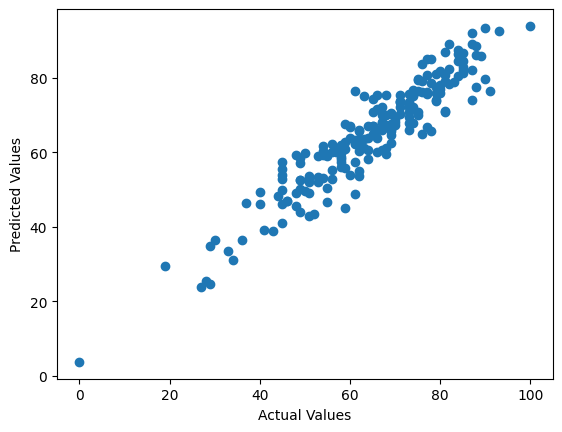

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.show()

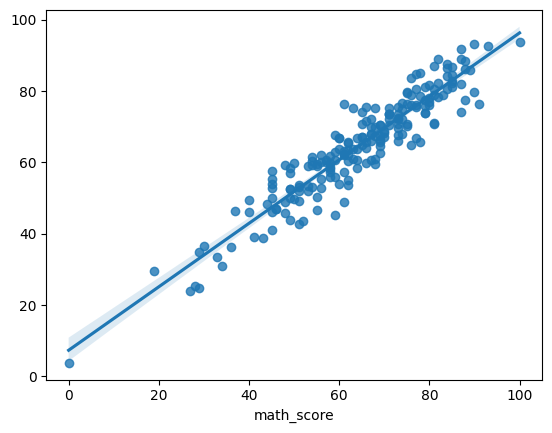

In [42]:
sns.regplot(x=y_test, y=y_pred);

In [43]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
